# Welcome to the AMIDR/AMID User Interface!

This notebook allows easy analysis of AMIDR/AMID data (from Dal and Novonix UHPC files or BioLogic files converted into UHPC format).

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls. Below are two universal arguments for every function call.

>**export_data**: Whether or not to save the processed data as a datatable or a series of datatables. <br> *Default is True*

>**export_fig**: Whether or not to save the resulting figures. <br> *Default is True*

To run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

## BioLogic Pre-processing (Ignore if UHPC)

Exported BioLogic files must first be pre-processed to generate UHPC-format files capable of being read by AMIDR. Please ignore this section if testing was done using Dal or Novonix UHPC cell testers. Check the second plot to ensure that there is strong relaxed potential agreement between charge and discharge. Poor agreement suggests substantial side reactions which will introduce error to the measured diffusivity values. 

>**cellpath**: The location on your computer where the BioLogic files are located and where the UHPC format files will be placed. This folder should dedicated to a single cell, so that it can be referenced in further analysis. All cellpath folders should be located within one larger folder to allow for cell to cell comparison. Following this file structure will allow you to never have to manually move files. Use "/", not "\\", for separating directories.

>**formfiles/dfiles/cfiles**: The names of the formation, discharge, and charge BioLogic files. Be sure to list them in chronological order and include the .mpt file extension.

>**cellname**: The name of the cell being measured. It's recommended to include information such as material and temperature.

All files get saved in the directory *cellpath*.

_________________________________
Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\235\235 NMC811 30C Form.csv

235_230507_D3,7-3,2V_C02.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\235\235 NMC811 30C Discharge.csv

Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\235\235 NMC811 30C Charge.csv

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\235\235 NMC811 30C Protocol.jpg


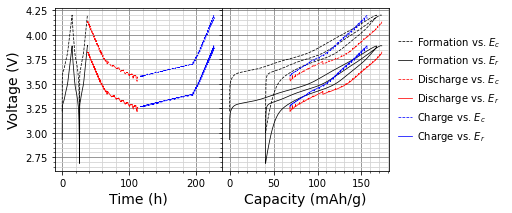


C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\235\235 NMC811 30C Relax Match.jpg


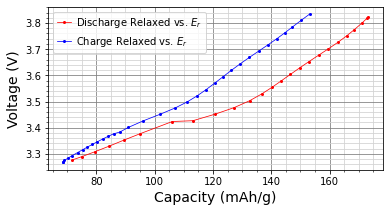

In [3]:
cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data/235'
formfiles = ['235_230502_C02.mpt']
dfiles = ['235_230504_D4,2-3,7V_C02.mpt', '235_230507_D3,7-3,2V_C02.mpt']
cfiles = ['235_230509_C3,5-3,7V_C02.mpt', '235_230515_C3,7-4,2V_C02.mpt']
cellname = '235 NMC811 30C'

from amidr import BIOCONVERT
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

## The AMIDR/AMID Object

#### [Optional Arguments (Advanced)](#The-AMIDR/AMID-Object:)

Instantiating the AMIDR/AMID object is easy! The resulting object (in this case *amidr_data*) will contain parsed data from the AMIDR/AMID dataset. You should read the block output to be sure it is giving the information you expect.

>**cellpath**: The location on your computer where the UHPC-format AMIDR/AMID files are located and where the analysis files will be placed. This folder should dedicated to a single cell, so that it can be referenced in further analysis. All cellpath folders should be located within one larger folder to allow for cell to cell comparison. Following this file structure will allow you to never have to manually move files. Use "/", not "\\", for separating directories.

>**uhpc_file**: The name of a UHPC-format AMIDR/AMID UHPC file to analyze. If BioLogic pre-processing was done, this is the charge or discharge file that was outputted by that. All analysis of this file will be labeled with and sent into a new subfolder of this file name. This file name should end with "Discharge.csv" or "Charge.csv". This will allow you to combine and average the resulting analysis with other analyses of the same material. If BioLogic pre-processing was done this has already been done automatically.

>**single_pulse**: Whether the data file being read comes from an AMIDR *(True)* or AMID *(False)* protocol. Parsing will fail if not selected correctly.

> **parselabel**: An additional label to append to the *uhpc_file* label on the figures and exported file names. This can be helpful for comparing different parsing settings upon the same dataset. Changing the label allows for the parsing to generate files to a new directory without overwriting the last parse results. <br> *Default is None*

All files get saved in the directory *cellpath/uhpc_file-parselabel*.

In [9]:
#cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data/270'
cellpath = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data/173'
#uhpc_file = '270 NM9505 30C Discharge.csv'
uhpc_file = '173 Discharge.csv'

from amidr import AMIDR
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse = True, fcap_min = 0.05, parselabel = '0.05fcap_min')

_________________________________
173 Discharge-0.05fcap_min

Working on cell: MAB_173_AMIDR-1_NM9505_30C_220414.csv
Positive electrode active mass: 0.001302 g
Input cell capacity: 0.00029295 Ah

Signature curve steps: 5 - 394
Voltages: 4.257 V - 3.000 V
Found 130 pulse steps in signature curves.

2 measurement(s) in pulse to 4.23516694 removed due to being below fcap min.

13 measurement(s) in pulse to 4.23111886 removed due to being below fcap min.

9 measurement(s) in pulse to 4.22347064 removed due to being below fcap min.

14 measurement(s) in pulse to 4.21299329 removed due to being below fcap min.

12 measurement(s) in pulse to 4.20073051 removed due to being below fcap min.

12 measurement(s) in pulse to 4.18658503 removed due to being below fcap min.

13 measurement(s) in pulse to 4.1763762 removed due to being below fcap min.

3 measurement(s) in pulse to 4.16853613 removed due to being below fcap min.

3 measurement(s) in pulse to 4.1544191 removed due to being below fcap mi

## Pre-fitting Plots

Now that the data is parsed, the standard plots can be produced. plot_protocol() plots the entire protocol being analyzed. plot_caps() plots pulses/intervals individually. The plots should be examined to ensure your test data is being parsed correctly.

All files get saved in the directory *cellpath/uhpc_file-parselabel*.

_________________________________
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\173\173 Discharge-0.05fcap_min\173 Discharge-0.05fcap_min Protocol.jpg


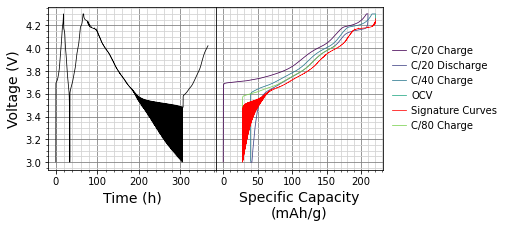


_________________________________
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\173\173 Discharge-0.05fcap_min\173 Discharge-0.05fcap_min Parsed.jpg


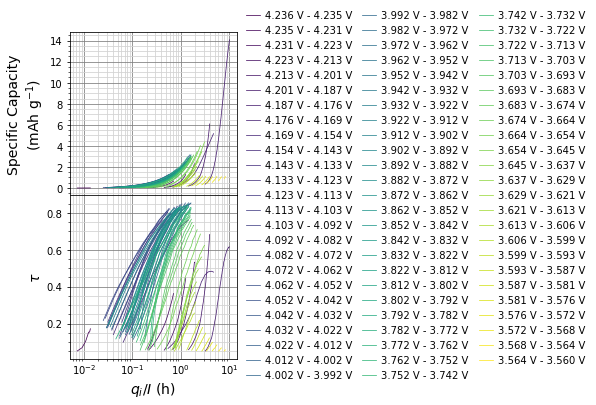

In [10]:
amidr_data.plot_protocol()
amidr_data.plot_caps()

## Data Fitting 

#### [Optional Arguments (Advanced)](#Data-Fitting:)

If your data has been correctly parsed, it is now time to fit it to calculate $D_c$ (and perhaps $R$ and $D_t^*$ too). Take care when selecting your arguments as this step can take some time.

> **radius**: The particle radius in cm. It is recommended to calculate this by measuring individual particles in SEM images and then take the mass-weighted geometric mean.

> **R_corr**: Whether the data is being fit to an AMIDR *(True)* or AMID *(False)* model. AMIDR's model includes $R$ as a source of impedance and will return both $D_c$ and $R$ values. AMID data can be fit to the AMIDR model, but this is not recommended as this will amplify systematic error in AMID's multi-rate protocol. AMIDR data can also be fit to AMID's model but this is not recommended as this allows $R$ to be falsely measured as $D_c$.

> **ionsat_inputs**: A list of optional inputs to calculate ion saturation and $D_t^*$. If left empty, ion saturation and $D_t^*$ will simply not be calculated. The six inputs are: <br> 
\- The temperature in K <br>
\- The theoretical max specific capacity in mAh/g of a completely saturated and desaturated active material<br> 
\- The specific capacity in mAh/g of an arbitrary point 1 in a half cell with regular mass loading <br> 
\- The voltage in V of an arbitrary point 1 in a half cell with regular mass loading <br> 
\- The specific capacity in mAh/g of an arbitrary point 2 in a half cell with regular mass loading <br>
\- The voltage in V of an arbitrary point 2 in a half cell with regular mass loading <br> 
Ideally, the specific capacities of the cell being tested could be used to calculate ion saturation. However, it is very difficult to accurately measure the amount of active mass for electrodes with very low mass loadings. This means the specific capacity of each fit is innaccurate producing error in ion saturation and $D_t^*$. To compensate for this, the cell's specific capacities can be linearly adjusted to match its voltages which are accurately measured. This is done with 2 datapoints from a regular mass loading half cell with accurately measured specific capacity and voltage. It's recommended that these two datapoints are far apart but still within the voltage range of the AMIDR test and are determined as the average of a charge datapoint and a discharge datapoint that are not located on a plateau or cliff edge. <br> *e.g., tracer_inputs = \[303, 275, 66, 3.7, 171, 4.1\]* <br> *Default is \[\]*

> **micR_input**: The density of the active material in g cm<sup>-3</sup>. This is necessary to calculate $ρ_{c}$, the interface contact resistivity (Ω cm<sup>2</sup>). This value is normalized by the surface area of the active material so that it is inherent to the material and not dependent on the mass loading. If it is believed that the primary source of the resistance is the interface resistance, this value will be calculated accurately. Regardless, it is expressed as the "maximum" $ρ_{c}$ because a portion of it, no matter how small, will be from other sources. Error in the active mass and density values will contribute a proportional error in the calculated interface contact resistivity. However, because interface contact resistivity often changes drastically on a logarithmic scale, this error can be mostly ignored. <br> *Default is 4.9*

> **fitlabel**: An additional label to append to the *uhpc_file* label on the figures and exported file names. This can be helpful for comparing different fitting settings upon the same dataset. Changing the label allows for the fitting to generate files to same directory without overwriting the last fits. This is separate from the parse label. <br> *Default is None*

All files get saved in the directory *cellpath/uhpc_file-parselabel*. 

Figures comparing theory to fitted values for each pulse/interval will not be previewed in this notebook because too many figures would be shown but they will be saved.

In [11]:
radius = 1.318e-4 #NM9505
#radius = 0.784e-4 #NMC640
#radius = 1.736e-4 #NMC811
ionsat_inputs = [303.15, 275, 66, 3.7, 149, 4.0] #NM9505
#ionsat_inputs = [303.15, 279, 74, 3.8, 148, 4.1] #NMC640
#ionsat_inputs = [303.15, 275.5, 70, 3.7, 178, 4.1] #NMC811

#fit_data = amidr_data.fit_atlung(radius, R_corr = False, ionsat_inputs = ionsat_inputs)
fit_data = amidr_data.fit_atlung(radius, R_corr = True, ionsat_inputs = ionsat_inputs)

_________________________________
Optimum Parameters: Log(Dc) Log(P) Log(P/Dc)
4.236 V - 4.235 V: [-10.731  -1.838   8.894]
4.235 V - 4.231 V: [-11.85   -1.431  10.419]
4.231 V - 4.223 V: [-12.198  -1.849  10.349]
4.223 V - 4.213 V: [-12.199  -1.39   10.809]
4.213 V - 4.201 V: [-12.191  -1.148  11.043]
4.201 V - 4.187 V: [-12.069  -0.596  11.473]
4.187 V - 4.176 V: [-12.371  -0.563  11.808]
4.176 V - 4.169 V: [-12.806  -2.382  10.424]
4.169 V - 4.154 V: No fit within P bounds
4.154 V - 4.143 V: No fit within P bounds
4.143 V - 4.133 V: No fit within P bounds
4.133 V - 4.123 V: No fit within P bounds
4.123 V - 4.113 V: [-11.499  -3.849   7.649]
4.113 V - 4.103 V: [-11.424  -2.022   9.402]
4.103 V - 4.092 V: No fit within P bounds
4.092 V - 4.082 V: No fit within P bounds
4.082 V - 4.072 V: No fit within P bounds
4.072 V - 4.062 V: No fit within P bounds
4.062 V - 4.052 V: No fit within P bounds
4.052 V - 4.042 V: [-11.545  -2.149   9.396]
4.042 V - 4.032 V: [-11.396  -1.294  10.102]
4.0

## Summary Graph

Check the summary graph of your fits to visualize results quickly and to ensure your data was fit correctly.

> **fit_data**: The results of the data fitting that must be passed to this function.

All files get saved in the directory *cellpath/uhpc_file-parselabel*. 

_________________________________
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\173\173 Discharge-0.05fcap_min\173 Discharge-0.05fcap_min Summary.jpg


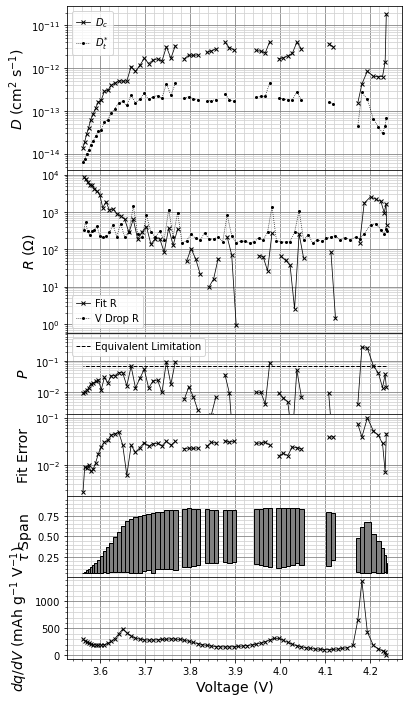

In [12]:
amidr_data.make_summary_graph(fit_data=fit_data)

## Outlier Removal and Bin Averaging

#### [Optional Arguments (Advanced)](#Outlier-Removal-and-Bin-Averaging:)

Multiple fittings of different cells with the same active material can be compared and averaged together. Because the voltage of each fit is inconsistent cell to cell, averaging is done by binning fit results of certain voltage ranges together. Before averaging, outliers known to be erroneous are removed based upon the relative change in capacity ($τ$) span of a fit and the change in $dq/dV$ from fit to fit.

>**path**: The location on your computer where dedicated cell data folders are located. This should be folder containing the *cellpath* folders dedicated to single cells that were defined earlier. Use "/", not "\\", for separating directories.

>**cells**: The folder names on your computer where dedicated cell data is stored. Do not include the entire directory location, just the folder names.

>**matname**: The name of the material being measured. It's recommended to also include temperature. All analysis of this material will be sent into a new subfolder of this file name.

>**binsize**: The size of the averaging bins in V. <br> *Default is 0.025*

All files get saved in the directory *path/matname*. 

_________________________________
Found discharge data for cell 149
Filtered data exporting to:
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\149 NM9505 30C Discharge-r Filtered.xlsx

Found discharge data for cell 150
Filtered data exporting to:
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\150 NM9505 30C Discharge-r Filtered.xlsx

Found discharge data for cell 151
Filtered data exporting to:
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\151 NM9505 30C Discharge-r Filtered.xlsx

C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\NM9505 30C-r Individual Cells.jpg


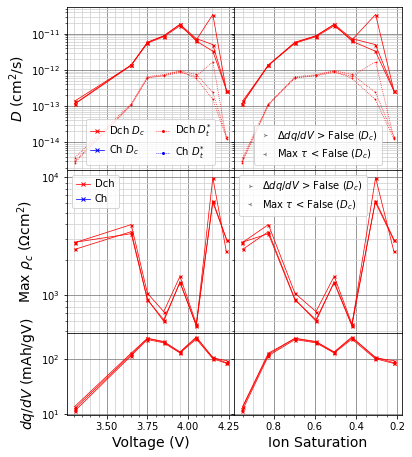


C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\NM9505 30C-r Ch vs Dch.jpg


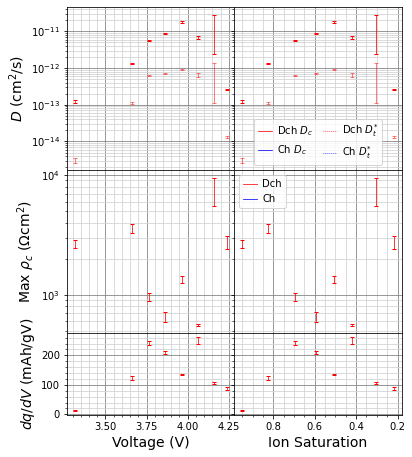


C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\NM9505 30C-r All.jpg


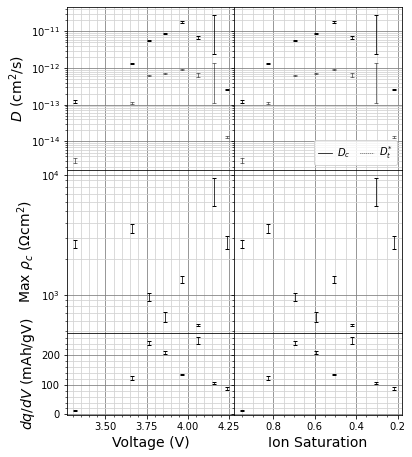


Bin averaged data exporting to:
C:\Users\Mitch\Lab\Commercial Material\ZhenHua\Atlung\Data\NM9505 30C-r\NM9505 30C-r (149, 150, 151).xlsx



In [162]:
#path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
path = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data'
cells = ['149', '150', '151']
matname = 'NM9505 30C'

from amidr import BINAVERAGE
BINAVERAGE(path, cells, matname, binsize = 0.025, mincap = False, maxdqdVchange = False, fitlabel = 'r')

## Material Comparison

Up to 4 active materials can be compared against eachother. 

>**path**: The location on your computer where material data folders are located. This should be same folder containing the *cellpath* folders. Use "/", not "\\", for separating directories.

>**mats**: The folder names on your computer where material data is stored. Do not include the entire directory location, just the folder names. These should be the same as the *matname* labels defined earlier.

All files get saved in the directory *path*. 

In [ ]:
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NM9505 30C', 'NMC640 30C', 'NMC811 30C']

from amidr import MATCOMPARE
MATCOMPARE(path, mats)

__________
# Optional Arguments:

### The AMIDR/AMID Object:

>**use_input_cap**: Whether to use the capacity on the file label or to use the total capacity elapsed in the file to calculate rates for labelling. This only impacts pre-fitting outputs and is irrelevant for calculating $D_c$ and $R$. <br> *Default is True*

>**spliced**: Whether to properly read step numbers for AMID files that have been manually spliced together due to the test having to be restarted on account of power failure or other reasons. Not available for AMIDR. <br> *Default is False*

>**capacitance_corr**: Whether to enable additional processing to neglect the capacity of the double layer capacitance when calculating relative change in capacity ($τ$). Ohmic resistance and double layer capacitance are estimated from the lowest voltage pulse. Enabling this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but the correction is imperfect and is not recommended. If enabling this, it is recommended to use *parselabel*. <br> *Default is False* <br> *Irrelevant for AMID*

>**fcap_min**: A fractional value for the lower limit of the relative change in capacity ($τ$) allowed to be considered for data fitting. Raising this may assist with AMID fitting when high rate pulses immediately hit a voltage limit or with AMIDR fitting when initial datapoints are suspect but is not recommended for either. If adjusting this, it is recommended to use *parselabel*. <br> *Default is 0.0* <br> 

>**force2e**: Whether or not to include counter electrode impedance and force a 3 electrode cell to be analyzed as if it was 2 electrodes. This is ignored if no 3 electrode data is detected. If enabling this, it is recommended to use *parselabel*. <br> *Default is False*

### Data Fitting:

> **D_bounds**: Bounds for $D_{c}$. Results can be somewhat outside these bounds if using AMIDR analysis as technically $P$ and $P$/$D_{c}$ are being fit to improve fitting accuracy. <br> *Default is \[1.0e-17, 1.0e-8\]*

> **D_guess**: Initial guess for $D_{c}$. <br> *Default is 1.0e-11*

> **P_bounds**: Bounds for $P$. <br> *Default is \[1.0e-6, 1.0e1\]* <br> *Irrelevant for AMID*

> **P_guess**: Initial guess for $P$. <br> *Default is 1.0e-2* <br> *Irrelevant for AMID*

> **remove_out_of_bounds**: Allows for fits with $P$ at the bound limits to not be recorded. <br> *Default is True* <br> *Irrelevant for AMID*

> **fcapadj_bounds**: Bounds for the adjustment to the total capacity of an interval for AMID protocol datasets. The cumulative capacity achieved by the final low current pulse used for calculating relative change in capacity ($τ$) is slightly less than the theoretical total capacity. Therefore some positive adjustment is allowed. This is irrelevant for AMIDR analysis. <br> *Default is \[1.0, 1.5\]* <br> *Irrelevant for AMIDR*

> **fcapadj_guess**: Initial guess for the adjustment to the total capacity of an interval for AMID protocol datasets. This is irrelevant for AMIDR analysis. <br> *Default is 1.0* <br> *Irrelevant for AMIDR*

> **shape**: Particle geometry being modeled. Currently only supports 'sphere'. <br> *Default is 'sphere'.*

> **nalpha**: The number of expansion coefficients to use in the Atlung expression. <br> *Default is 4000.*

> **nQ** : The number of $Q$ values (on a log scale) to use in the black Atlung model curve for comparing fit quality. <br> *Default is 4000.*

### Outlier Removal and Bin Averaging:

>**maxdqdVchange**: The maximum allowed multiplicative increase or decrease in $dq/dV$ from one fit to its adjacent fits. For instance, if one fit has a $dq/dV$ of 500 mAh/gV, the next fit has a $dq/dV$ of 200 mAh/gV and the *maxdqdVchange* is set to 2, then both of these fittings would not included in the averaging because 500/200 = 2.5 > 2. A large change in $dq/dV$ from fitting to fitting suggests that there is a significant change in $dq/dV$ within the fitting which produces error. As the first and last fittings only have single adjacent fittings they are automatically removed as their $dq/dV$ stability cannot be proven. If you do not wish to remove these outliers set to False. <br> *Default is 2*

>**mincap**: The minimum allowed relative change in capacity ($τ$) of a fitting. Fittings without enough capacity demonstrate that a complete pulse was not achieved. For AMIDR, this also suggests that the relaxation times were inadequate as the protocols are designed for the pulse times to be roughly equivalent to the relaxation times and the time to achieve a complete pulse is roughly equivalent to the time necessary to completely relax. The word "complete" is figurative here as technically neither a pulse nor a relaxation can reach an absolute steady state. If you do not wish to remove these outliers set to False. <br> *Default is 0.5*

> **parselabel**: An additional label previously appended to the *uhpc_file* label on the exported file names. Use this if you wish to average data containing this label. If you wish to average data that wasn't given an additional label, ignore this argument. <br> *Default is None*

> **fitlabel**: An additional label previously appended to exported file names. Use this if you wish to average data containing this label. If you wish to average data that wasn't given an additional label, ignore this argument. <br> *Default is None*